## Project

## 1. Introduction

Pricing of products plays an important role in the automotive Industry. Therefore, developing an effective model to predict the price of the automobile according to certain features would be important for car manufacturers to make a proper decision about their products in a new market. Here, we have a data set of different types of cars across the American market. We may use decision trees, linear regression, logistic regression, k-NN , and SVM to model the price of cars as a response variable with the predicted variables (fuel type, carbody, drivetrains, engine location, etc.). Then we will make a comparison and analysis about the feature and accuracy for each method, and therefore find the optimal one. 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist

from sklearn.preprocessing import OneHotEncoder
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree 
from sklearn.tree import export_text
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from imblearn.over_sampling import RandomOverSampler

## 2. read data

In [2]:
df = pd.read_csv('/Users/zhangzhengyang/Downloads/archive (1)/CarPrice_Assignment.csv',index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 3. Question

As for the research question, we are interested in what factors might have significant effect on the price of the car.  To be specific, we could investigate the classification of cars by decision tree to find out what makes certain types more expensive than others, price unlisted cars by regression methods when features are known, etc.

 ## 4. Feature Engineering

In [4]:
##Check missing values
df.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
##remove Carname and price to get "X"
X_data=df.drop(['car_ID','CarName','price'],axis=1)

In [6]:
#non numerical variables
X_object = X_data[X_data.columns[X_data.dtypes == object]]
X_object.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [7]:
X_binary=X_object.join(pd.get_dummies(X_object.aspiration,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.fueltype,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.doornumber,drop_first=False))
X_binary=X_binary.rename(columns={"two": "doornumber_two", "four": "doornumber_four"})
X_binary=X_binary.join(pd.get_dummies(X_binary.carbody,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.drivewheel,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.enginelocation,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.enginetype,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.cylindernumber,drop_first=False))
X_binary=X_binary.join(pd.get_dummies(X_binary.fuelsystem,drop_first=False))

In [8]:
X_binary

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,std,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,0,...,0,0,0,0,0,0,0,1,0,0
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,1,...,0,0,0,0,0,0,0,1,0,0
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
##Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)
X_binary=X_binary.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],axis=1)

In [10]:
X_binary

,std,turbo,diesel,gas,doornumber_four,doornumber_two,convertible,hardtop,hatchback,sedan,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
201,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
203,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [11]:
X_float= X_data[X_data.columns[X_data.dtypes!= object]]

In [12]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X_float)

In [13]:
X_scaled

array([[1.        , 0.05830904, 0.41343284, ..., 0.34693878, 0.22222222,
        0.28947368],
       [1.        , 0.05830904, 0.41343284, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.6       , 0.2303207 , 0.44925373, ..., 0.34693878, 0.16666667,
        0.26315789],
       ...,
       [0.2       , 0.65597668, 0.7119403 , ..., 0.55102041, 0.13888889,
        0.18421053],
       [0.2       , 0.65597668, 0.7119403 , ..., 0.26530612, 0.36111111,
        0.28947368],
       [0.2       , 0.65597668, 0.7119403 , ..., 0.51020408, 0.16666667,
        0.23684211]])

In [14]:
len(X_scaled)

205

In [15]:
X_scaled = pd.DataFrame(X_scaled, columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'])

In [16]:
X_scaled

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [17]:
X_original=X_binary.join(X_scaled)

In [18]:
X_original

,std,turbo,diesel,gas,doornumber_four,doornumber_two,convertible,hardtop,hatchback,sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,0,1,0,1,1,0,0,0,...,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,1,0,0,1,0,1,1,0,0,0,...,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,1,0,0,1,0,1,0,0,1,0,...,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,1,0,0,1,1,0,0,0,0,1,...,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,1,0,0,1,1,0,0,0,0,1,...,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,1,1,0,0,0,0,1,...,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0,1,0,1,1,0,0,0,0,1,...,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,1,0,0,1,1,0,0,0,0,1,...,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0,1,1,0,1,0,0,0,0,1,...,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [19]:
X_original.columns

Index(['std', 'turbo', 'diesel', 'gas', 'doornumber_four', 'doornumber_two',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd',
       'rwd', 'front', 'rear', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [20]:
y_original=df[['price']]

 ## 5. Regression Model

In [21]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X_original.to_numpy(), y_original.to_numpy(), test_size=.2,
                                                  random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0)

In [22]:
##Three Linear Regression without binary data
models = [linear_model.LinearRegression(),
              linear_model.Lasso(max_iter=2000),
              linear_model.Ridge()]
model_parameter = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_','accuracy'])
for model in models:
        model.fit(X_train, y_train)
        MSE_train = (1/y_train.size) * np.sum((y_train - model.predict(X_train))**2)
        MSE_test = (1/y_test.size)  * np.sum((y_test - model.predict(X_test))**2)
        model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
                                     'MSE_test': MSE_test, '.intercept_': model.intercept_,
                                    '.coef_': [np.round(model.coef_[1:], 2)],'accuracy':model.score(X_valid,y_valid)}), ignore_index=True)
pd.set_option('display.precision', 2)
print(model_parameter)

                  model  MSE_train  MSE_test  .intercept_  \
0    LinearRegression()   3.07e+06  2.89e+31    -7.00e+17   
1  Lasso(max_iter=2000)   1.92e+10  2.63e+09     1.38e+04   
2               Ridge()   3.77e+06  1.33e+07     1.11e+04   

                                              .coef_  accuracy  
0                                                 [] -1.37e+24  
1  [0.0, 6670.71, -0.0, 598.65, -0.0, 3615.76, -5...  8.70e-01  
2                                                 []  8.30e-01  


<ipython-input-22-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
<ipython-input-22-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
<ipython-input-22-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,


 ## 5. Classification

In [23]:
df.price.describe()

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

In [24]:
##bining
y_class=pd.cut(df.price, bins=[5000,8000,16000, 50000 ], right=False, 
       labels=['Low-level Cars', 'Intermediate Cars', 'Premium Cars'])

In [25]:
X_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [26]:
##decision tree
X_train, X_tmp, y_train, y_tmp = train_test_split(X_original, y_class, test_size=.2,
                                                  random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0)

In [27]:
# Here is a basic ID3 DecisionTree from long ago in unit 3.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5000)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'DecisionTree validation_score={validation_score:.3}')

DecisionTree validation_score=0.75


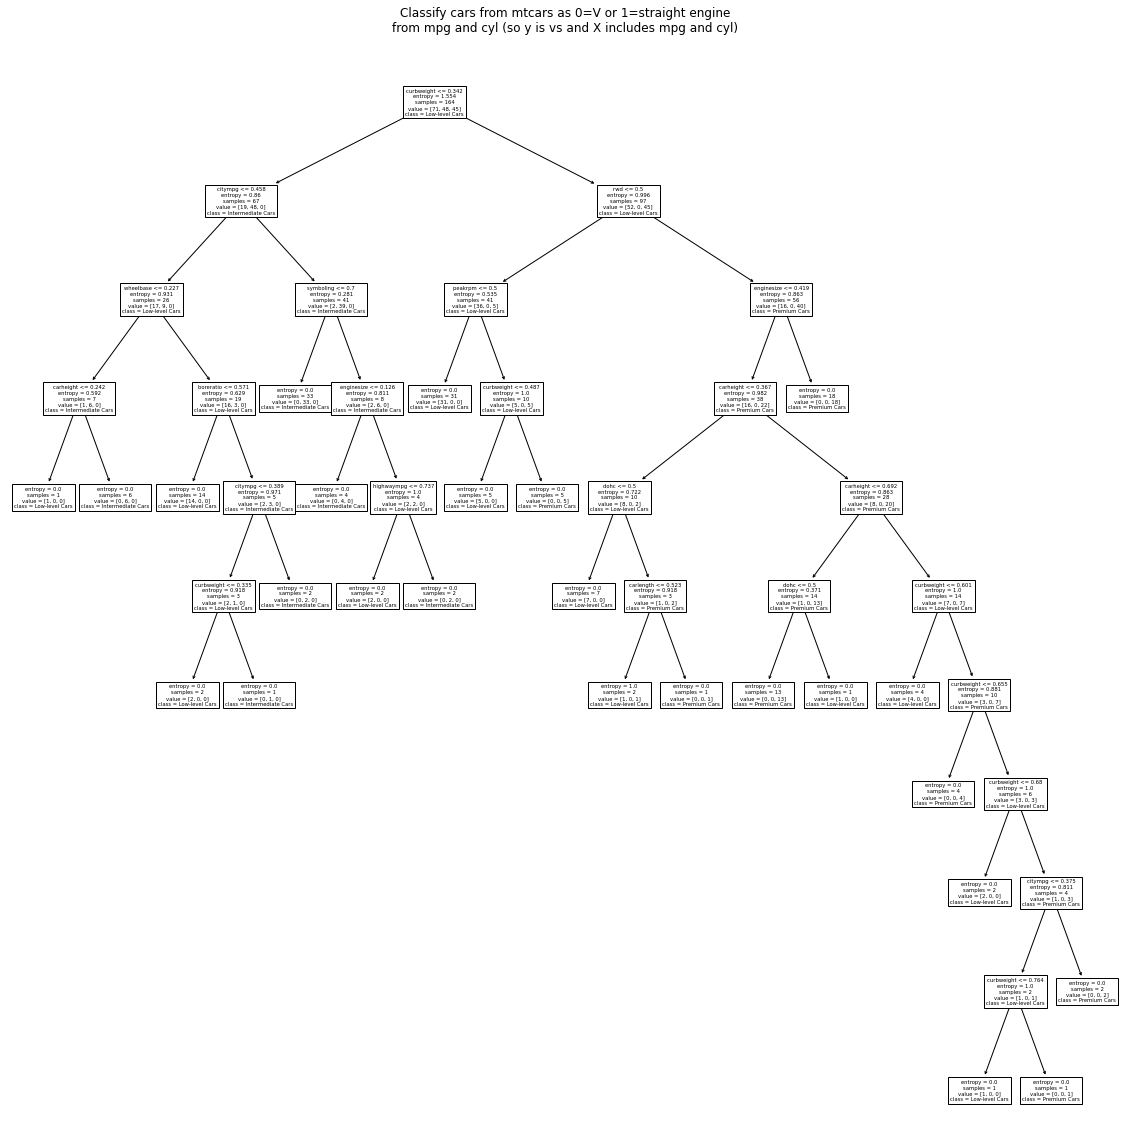

|--- curbweight <= 0.34
|   |--- citympg <= 0.46
|   |   |--- wheelbase <= 0.23
|   |   |   |--- carheight <= 0.24
|   |   |   |   |--- class: Intermediate Cars
|   |   |   |--- carheight >  0.24
|   |   |   |   |--- class: Low-level Cars
|   |   |--- wheelbase >  0.23
|   |   |   |--- boreratio <= 0.57
|   |   |   |   |--- class: Intermediate Cars
|   |   |   |--- boreratio >  0.57
|   |   |   |   |--- citympg <= 0.39
|   |   |   |   |   |--- curbweight <= 0.34
|   |   |   |   |   |   |--- class: Intermediate Cars
|   |   |   |   |   |--- curbweight >  0.34
|   |   |   |   |   |   |--- class: Low-level Cars
|   |   |   |   |--- citympg >  0.39
|   |   |   |   |   |--- class: Low-level Cars
|   |--- citympg >  0.46
|   |   |--- symboling <= 0.70
|   |   |   |--- class: Low-level Cars
|   |   |--- symboling >  0.70
|   |   |   |--- enginesize <= 0.13
|   |   |   |   |--- class: Low-level Cars
|   |   |   |--- enginesize >  0.13
|   |   |   |   |--- highwaympg <= 0.74
|   |   |   |   |  

In [28]:
feature_names = ['std', 'turbo', 'diesel', 'gas', 'doornumber_four', 'doornumber_two',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd',
       'rwd', 'front', 'rear', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']
X = X_original[feature_names].to_numpy()
y = df[['price']].to_numpy()
class_names = ['Low-level Cars', 'Intermediate Cars', 'Premium Cars']
plt.figure(figsize=(20, 20)) # (width, height) in inches                                                             
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names)
plt.title('Classify cars from mtcars as 0=V or 1=straight engine\n' +
          'from mpg and cyl (so y is vs and X includes mpg and cyl)\n')
plt.savefig(fname='mtcarsDecision.png')
plt.show(block=False)
print(export_text(clf, feature_names=feature_names))

In [36]:
# Here is Bagging with the DecisionTree and some default values.
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000),
                        n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'Bagging validation_score={validation_score:.3}')

# Here is a RandomForest. I tuned the max_depth=8 by hand, starting
# with 2, getting lousy results, and finding 8 was best of 2 through 9.
clf = RandomForestClassifier(max_depth=5000, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'RandomForest validation_score={validation_score:.3}')

# Here is GradientBoosting with default values.
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,
    max_depth=1, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'GradientBoosting validation_score={validation_score:.3}')

Bagging validation_score=0.75
RandomForest validation_score=0.75
GradientBoosting validation_score=0.85


In [41]:
classifiers = [svm.SVC(), linear_model.LogisticRegression(),
               DecisionTreeClassifier(), KNeighborsClassifier()]
parameters = [{'kernel':['linear', 'rbf'], 'C':[0.01, 1,50, 75,100,125,250,500,10000]}, {'max_iter':[100000],'C':[0.01, 1, 100,1000]}, 
              {'criterion':['entropy'],'max_depth':[1,3,5,7,10,50,100,250,500,1000,10000]}, {'n_neighbors':[1,2,3,4,6,7,8,9,10]}]
index=-1
best_accuracy_score = -np.Inf
best_classifier=None
for i in np.arange(4):
    clf=GridSearchCV(classifiers[i],parameters[i])
    clf.fit(X_train,y_train)
    accuracy = clf.score(X_valid, y_valid)
    print(f'Accuracy is {accuracy:.3} and best hyperparameters is {clf.best_params_}')
    if accuracy > best_accuracy_score:
        index = i
        best_accuracy_score = accuracy
        best_classifier = clf

Accuracy is 0.65 and best hyperparameters is {'C': 100, 'kernel': 'linear'}
Accuracy is 0.7 and best hyperparameters is {'C': 100, 'max_iter': 100000}
Accuracy is 0.75 and best hyperparameters is {'criterion': 'entropy', 'max_depth': 100}
Accuracy is 0.65 and best hyperparameters is {'n_neighbors': 1}


 ## 6. Remove Outliers

/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

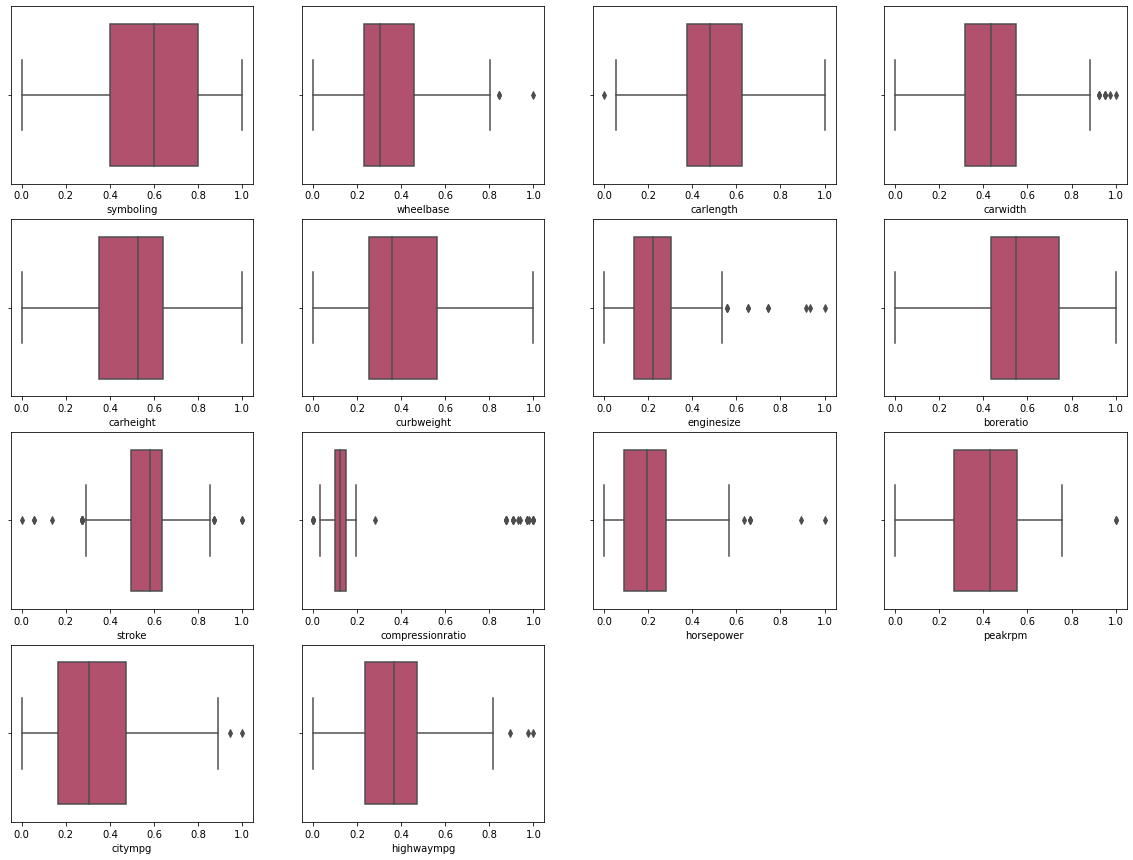

In [46]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(X_original[l], palette="flare")
box_plot(['symboling', 'wheelbase', 'carlength', 'carwidth'
                  , 'carheight', 'curbweight', 'enginesize', 'boreratio'
                 ,'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'])

In [53]:
##find outliers. (Note: we will not remove outliers in enginesize, stroke, compressionratio and horsepower)
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
outliers_row=np.concatenate((find_outliers_IQR(X_original.wheelbase).index.to_numpy()
                , find_outliers_IQR(X_original.carlength).index.to_numpy(),
                            find_outliers_IQR(X_original.carwidth).index.to_numpy(),
                            find_outliers_IQR(X_original.horsepower).index.to_numpy(),
                            find_outliers_IQR(X_original.peakrpm).index.to_numpy(),
                            find_outliers_IQR(X_original.citympg).index.to_numpy(),
                            ), axis=None)

array([ 70,  71,  73,  18,   6,   7,   8,  70,  71,  73,  74, 129,  49,
       105, 126, 127, 128, 129, 165, 166,  18,  30])

In [57]:
X_no_outliers=X_original.drop(X_original.index[[70,  71,  73,  18,   6,   7,   8,  70,  71,  73,  74, 129,  49,
       105, 126, 127, 128, 129, 165, 166,  18,  30]])
y_no_outliers=y_original.drop(X_original.index[[70,  71,  73,  18,   6,   7,   8,  70,  71,  73,  74, 129,  49,
       105, 126, 127, 128, 129, 165, 166,  18,  30]])

 ## 7. Dimension Reduction

In [58]:
diabetes = datasets.load_diabetes()
X = X_no_outliers
y = y_no_outliers

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     39.24
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.31e-60
Time:                        00:38:27   Log-Likelihood:                -1691.3
No. Observations:                 188   AIC:                             3459.
Df Residuals:                     150   BIC:                             3582.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
std                500.2362    761.159  

/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [60]:
##remove a feature when P>|t|>=0.05
X1=X_no_outliers[['turbo',
                 'doornumber_two',
                 'convertible',
                 'front',
                 'ohc',
                 'ohcv',
                 'rotor',
                 'eight',
                 'five',
                 'four',
                 'two',
                 'carwidth',
                 'curbweight',
                 'enginesize',
                 'stroke',
                 'peakrpm']]

In [61]:
##do it again
diabetes = datasets.load_diabetes()
X = X1
y = y_no_outliers

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     95.04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           2.10e-73
Time:                        00:46:12   Log-Likelihood:                -1710.7
No. Observations:                 188   AIC:                             3451.
Df Residuals:                     173   BIC:                             3500.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
turbo           1810.9372    535.910      3.

/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [63]:
##remove a feature when P>|t|>=0.05
X2=X_no_outliers[['turbo',
                 'convertible',
                 'front',
                 'ohc',
                 'ohcv',
                 'five',
                 'four',
                 'carwidth',
                 'curbweight',
                 'enginesize',
                 'stroke',
                 'peakrpm']]

In [64]:
##do it again
diabetes = datasets.load_diabetes()
X = X2
y = y_no_outliers

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           3.38e-75
Time:                        00:47:54   Log-Likelihood:                -1713.9
No. Observations:                 188   AIC:                             3452.
Df Residuals:                     176   BIC:                             3491.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
turbo        1651.9351    524.483      3.150      

/Users/zhangzhengyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


## 7. Run Previous models

In [80]:
X=X2
y=y_no_outliers

In [81]:
X

,turbo,convertible,front,ohc,ohcv,five,four,carwidth,curbweight,enginesize,stroke,peakrpm
0,0,1,1,0,0,0,1,0.32,0.41,0.26,0.29,0.35
1,0,1,1,0,0,0,1,0.32,0.41,0.26,0.29,0.35
2,0,0,1,0,1,0,0,0.43,0.52,0.34,0.67,0.35
3,0,0,1,1,0,0,1,0.49,0.33,0.18,0.63,0.55
4,0,0,1,1,0,1,0,0.51,0.52,0.28,0.63,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,0,0,1,0.72,0.57,0.30,0.51,0.51
201,1,0,1,1,0,0,1,0.71,0.61,0.30,0.51,0.47
202,0,0,1,0,1,0,0,0.72,0.59,0.42,0.38,0.55
203,1,0,1,1,0,0,0,0.72,0.67,0.32,0.63,0.27


In [82]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [83]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X.to_numpy(), y.to_numpy(), test_size=.2,
                                                  random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0)

In [84]:
##Three Linear Regression without binary data
models = [linear_model.LinearRegression(),
              linear_model.Lasso(max_iter=2000),
              linear_model.Ridge()]
model_parameter = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_','accuracy'])
for model in models:
        model.fit(X_train, y_train)
        MSE_train = (1/y_train.size) * np.sum((y_train - model.predict(X_train))**2)
        MSE_test = (1/y_test.size)  * np.sum((y_test - model.predict(X_test))**2)
        model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
                                     'MSE_test': MSE_test, '.intercept_': model.intercept_,
                                    '.coef_': [np.round(model.coef_[1:], 2)],'accuracy':model.score(X_valid,y_valid)}), ignore_index=True)
pd.set_option('display.precision', 2)
print(model_parameter)

                  model  MSE_train  MSE_test  .intercept_  \
0    LinearRegression()   5.18e+06  2.54e+06      5533.37   
1  Lasso(max_iter=2000)   1.21e+10  9.24e+08      5524.10   
2               Ridge()   6.06e+06  2.64e+06      6607.63   

                                              .coef_  accuracy  
0                                                 []      0.87  
1  [5035.85, 0.0, 3089.73, -5657.72, -4325.28, -6...      0.87  
2                                                 []      0.81  


<ipython-input-84-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
<ipython-input-84-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,
<ipython-input-84-82998a449731>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameter = model_parameter.append(pd.DataFrame({'model': model, 'MSE_train': MSE_train,


In [85]:
##decision tree
##bining
y_class=pd.cut(y.price, bins=[5000,8000,16000, 50000 ], right=False, 
       labels=['Low-level Cars', 'Intermediate Cars', 'Premium Cars'])

X_train, X_tmp, y_train, y_tmp = train_test_split(X,y_class, test_size=.2,
                                                  random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0)

In [87]:
# Here is a basic ID3 DecisionTree from long ago in unit 3.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5000)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'DecisionTree validation_score={validation_score:.3}')

DecisionTree validation_score=0.842


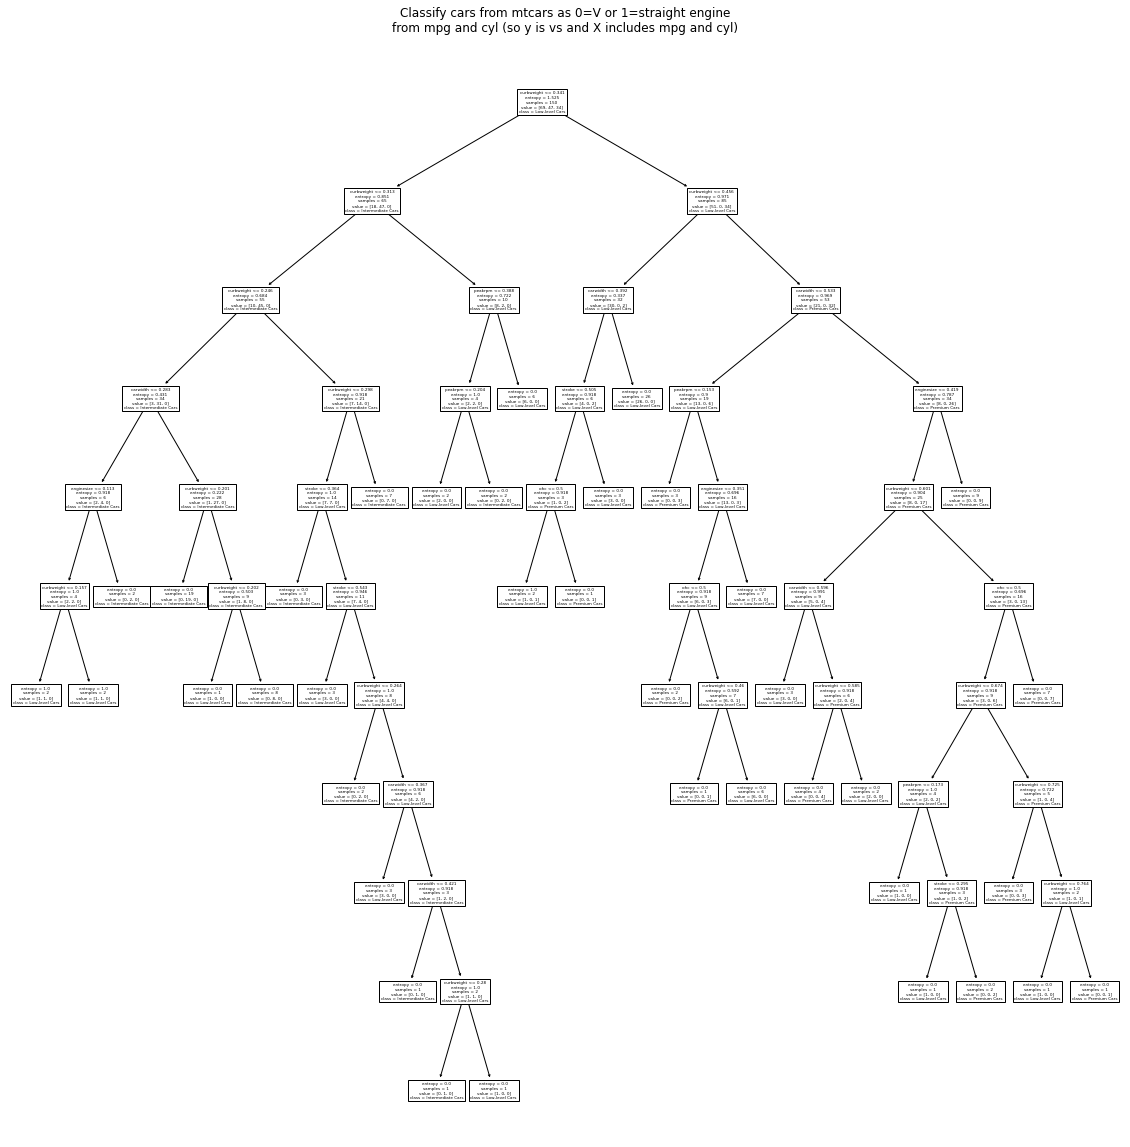

|--- curbweight <= 0.34
|   |--- curbweight <= 0.31
|   |   |--- curbweight <= 0.25
|   |   |   |--- carwidth <= 0.28
|   |   |   |   |--- enginesize <= 0.11
|   |   |   |   |   |--- curbweight <= 0.16
|   |   |   |   |   |   |--- class: Intermediate Cars
|   |   |   |   |   |--- curbweight >  0.16
|   |   |   |   |   |   |--- class: Intermediate Cars
|   |   |   |   |--- enginesize >  0.11
|   |   |   |   |   |--- class: Low-level Cars
|   |   |   |--- carwidth >  0.28
|   |   |   |   |--- curbweight <= 0.20
|   |   |   |   |   |--- class: Low-level Cars
|   |   |   |   |--- curbweight >  0.20
|   |   |   |   |   |--- curbweight <= 0.20
|   |   |   |   |   |   |--- class: Intermediate Cars
|   |   |   |   |   |--- curbweight >  0.20
|   |   |   |   |   |   |--- class: Low-level Cars
|   |   |--- curbweight >  0.25
|   |   |   |--- curbweight <= 0.30
|   |   |   |   |--- stroke <= 0.36
|   |   |   |   |   |--- class: Low-level Cars
|   |   |   |   |--- stroke >  0.36
|   |   |   |   | 

In [88]:
feature_names = ['turbo',
                 'convertible',
                 'front',
                 'ohc',
                 'ohcv',
                 'five',
                 'four',
                 'carwidth',
                 'curbweight',
                 'enginesize',
                 'stroke',
                 'peakrpm']
X = X_original[feature_names].to_numpy()
y = df[['price']].to_numpy()
class_names = ['Low-level Cars', 'Intermediate Cars', 'Premium Cars']
plt.figure(figsize=(20, 20)) # (width, height) in inches                                                             
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names)
plt.title('Classify cars from mtcars as 0=V or 1=straight engine\n' +
          'from mpg and cyl (so y is vs and X includes mpg and cyl)\n')
plt.savefig(fname='mtcarsDecision.png')
plt.show(block=False)
print(export_text(clf, feature_names=feature_names))

In [89]:
# Here is Bagging with the DecisionTree and some default values.
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000),
                        n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'Bagging validation_score={validation_score:.3}')

# Here is a RandomForest. I tuned the max_depth=8 by hand, starting
# with 2, getting lousy results, and finding 8 was best of 2 through 9.
clf = RandomForestClassifier(max_depth=5000, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'RandomForest validation_score={validation_score:.3}')

# Here is GradientBoosting with default values.
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,
    max_depth=1, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'GradientBoosting validation_score={validation_score:.3}')

Bagging validation_score=0.842
RandomForest validation_score=0.842
GradientBoosting validation_score=0.789


In [90]:
classifiers = [svm.SVC(), linear_model.LogisticRegression(),
               DecisionTreeClassifier(), KNeighborsClassifier()]
parameters = [{'kernel':['linear', 'rbf'], 'C':[0.01, 1,50, 75,100,125,250,500,10000]}, {'max_iter':[100000],'C':[0.01, 1, 100,1000]}, 
              {'criterion':['entropy'],'max_depth':[1,3,5,7,10,50,100,250,500,1000,10000]}, {'n_neighbors':[1,2,3,4,6,7,8,9,10]}]
index=-1
best_accuracy_score = -np.Inf
best_classifier=None
for i in np.arange(4):
    clf=GridSearchCV(classifiers[i],parameters[i])
    clf.fit(X_train,y_train)
    accuracy = clf.score(X_valid, y_valid)
    print(f'Accuracy is {accuracy:.3} and best hyperparameters is {clf.best_params_}')
    if accuracy > best_accuracy_score:
        index = i
        best_accuracy_score = accuracy
        best_classifier = clf

Accuracy is 0.842 and best hyperparameters is {'C': 500, 'kernel': 'rbf'}
Accuracy is 0.789 and best hyperparameters is {'C': 100, 'max_iter': 100000}
Accuracy is 0.789 and best hyperparameters is {'criterion': 'entropy', 'max_depth': 3}
Accuracy is 0.895 and best hyperparameters is {'n_neighbors': 1}
